In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
APP_FOLDER = 'D:\Bangkit\Final-Project\Machine Learning Model\dataset\images'
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(APP_FOLDER):
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

img_height = 150
img_width = 150
batch_size = 64

In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(104, activation='sigmoid')  
])


In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [31]:
from keras import regularizers
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(104, activation='sigmoid')  
])

In [32]:
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 34, 34, 64)       

In [5]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Bangkit\Final-Project\Machine Learning Model\dataset\images',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training"
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Bangkit\Final-Project\Machine Learning Model\dataset\images',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation"
)


Found 105291 files belonging to 104 classes.
Using 94762 files for training.
Found 105291 files belonging to 104 classes.
Using 10529 files for validation.


In [6]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

ds_train = ds_train.map(process)
ds_validation = ds_validation.map(process)

In [7]:
model.compile(optimizer=RMSprop(learning_rate=.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [8]:
history = model.fit(ds_train,
                    validation_data=ds_validation,
                    batch_size=64,
                    epochs=10,
                    verbose=1)

Epoch 1/10
1481/1481 [==============================] - 2750s 2s/step - loss: 0.0503 - accuracy: 0.1053 - val_loss: 0.0476 - val_accuracy: 0.1364
Epoch 2/10
1481/1481 [==============================] - 2566s 2s/step - loss: 0.0428 - accuracy: 0.2141 - val_loss: 0.0452 - val_accuracy: 0.2156
Epoch 3/10
1481/1481 [==============================] - 2374s 2s/step - loss: 0.0386 - accuracy: 0.2908 - val_loss: 0.0428 - val_accuracy: 0.2165
Epoch 4/10
1481/1481 [==============================] - 2379s 2s/step - loss: 0.0345 - accuracy: 0.3756 - val_loss: 0.0430 - val_accuracy: 0.2390
Epoch 5/10
1481/1481 [==============================] - 2392s 2s/step - loss: 0.0299 - accuracy: 0.4753 - val_loss: 0.0461 - val_accuracy: 0.2410
Epoch 6/10
1481/1481 [==============================] - 2385s 2s/step - loss: 0.0253 - accuracy: 0.5762 - val_loss: 0.0523 - val_accuracy: 0.2225
Epoch 7/10
1481/1481 [==============================] - 2376s 2s/step - loss: 0.0211 - accuracy: 0.6678 - val_loss: 0.0589 -

In [33]:
import math
training_size=94762
validation_size=10529
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
steps_per_epoch = compute_steps_per_epoch(training_size)
val_steps = compute_steps_per_epoch(validation_size)

In [37]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [39]:
history2 = model2.fit(ds_train,
                    validation_data=ds_vali  gthdation,
                    batch_size=64, 
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=val_steps,
                    epochs=10,
                    verbose=1)

SyntaxError: invalid syntax (<ipython-input-39-82c42acb4d39>, line 2)

Text(0.5, 1.0, 'Training and validation loss')

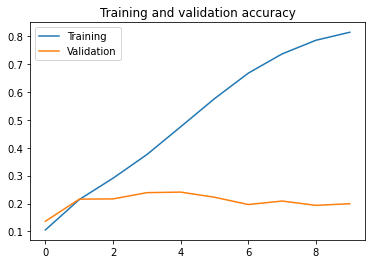

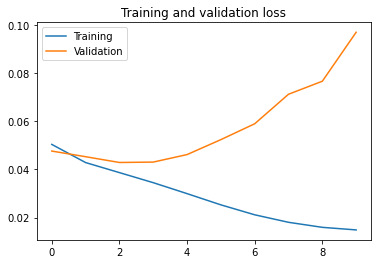

In [9]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [12]:
saved_model_path = "./Version1.h5"

model.save(saved_model_path)

In [13]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./linear

In [4]:
converter = tf.lite.TFLiteConverter.from_saved_model('./Version1')
tflite_model = converter.convert()

In [9]:
import pathlib
from pathlib import Path
tflite_model_file = pathlib.Path('./foo.tflite')
tflite_model_file.write_bytes(tflite_model)

38193368